In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import scipy
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from calculations import *

In [2]:
parent_path = '../../../../'
path = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/Lund/'

SMPS = read_SMPS(path, parent_path, [0, 0])
OPS_APS = read_OPS(path, parent_path)

Failed to read file with separation: 	
Failed to read file with separation: ,
Failed to read file with separation: ,
Failed to read file with separation: 	
Failed to read file with separation: ,
Failed to read file with separation: ,


In [3]:
timestamps_BG_before = [['2024-10-16 10:10:00', '2024-10-16 10:20:00'],
                        ['2024-10-16 14:30:00', '2024-10-16 14:40:00'],
                        ['2024-10-17 09:40:00', '2024-10-17 09:50:00'],
                        ['2024-10-17 13:20:00', '2024-10-17 13:30:00']]

timestamps_exp = [['2024-10-16 10:45:00', '2024-10-16 12:26:00'],
                  ['2024-10-16 15:00:00', '2024-10-16 15:34:00'],
                  ['2024-10-17 10:20:00', '2024-10-17 12:01:00'],
                  ['2024-10-17 14:30:00', '2024-10-17 15:01:00']]

ax_labels = ['Particle diameter / $\mu$m', 'Number concentration / #/cm$^{3}$', 'Mass concentration / $\mu$g/m$^{3}$']

In [4]:
OPS_dict_keys = ['Exp1', 'Exp2', 'Exp3', 'Exp4']
OPS_mid_point = [0.337, 0.419, 0.522, 0.650, 0.809, 1.007, 1.254, 1.562, 1.944, 2.421, 3.014, 3.752, 4.672, 5.816, 7.241, 9.015]
OPS_bins = OPS_APS['Exp1'].keys()[1:17].to_list()

OPS_mass_conc = {}
for key in OPS_dict_keys:
    mass_conc = calc_mass_conc(OPS_APS[key], OPS_bins, OPS_mid_point, 7.86)
    OPS_mass_conc[key] = mass_conc

OPS_running_number = {}
OPS_running_mass = {}
for i, key in enumerate(OPS_dict_keys):
    bg_number = running_mean(OPS_APS, key, OPS_bins, 'Time', '10T', 10, timestamps_BG_before[i])
    exp_number = running_mean(OPS_APS, key, OPS_bins, 'Time', '10T', 10, timestamps_exp[i])
    OPS_running_number[key] = pd.concat([bg_number, exp_number]).T
    bg_mass = running_mean(OPS_mass_conc, key, OPS_bins, 'Time', '10T', 10, timestamps_BG_before[i])
    exp_mass = running_mean(OPS_mass_conc, key, OPS_bins, 'Time', '10T', 10, timestamps_exp[i])
    OPS_running_mass[key] = pd.concat([bg_mass, exp_mass]).T

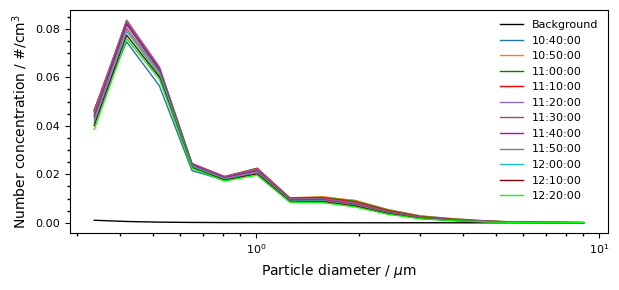

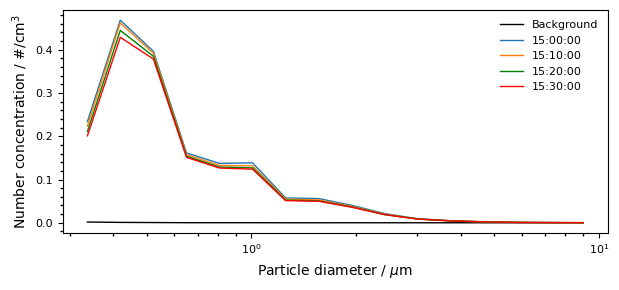

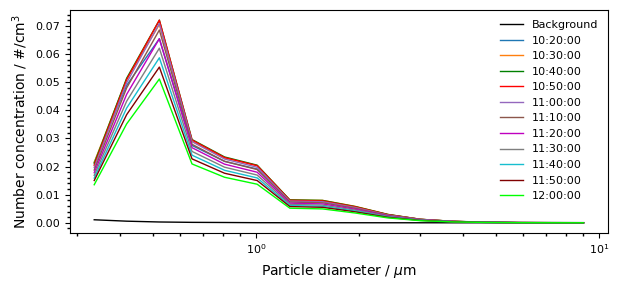

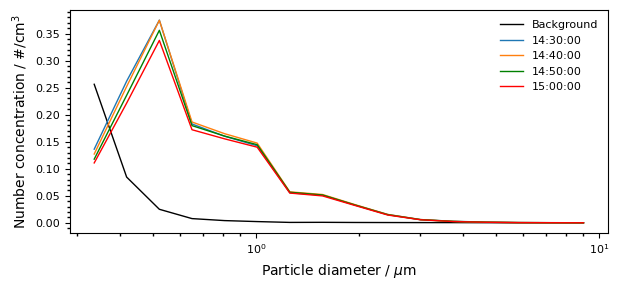

In [5]:
for i, key in enumerate(OPS_dict_keys):
    name = 'Running_mean/OPS_running_' + key + 'number.png'

    fig, ax = plt.subplots(figsize = (6.3, 3))

    plot_running_mean(ax, OPS_running_number[key], OPS_mid_point, 1, ax_labels[:2])

    fig.tight_layout()
    fig.savefig(name, dpi = 600)
    plt.show()

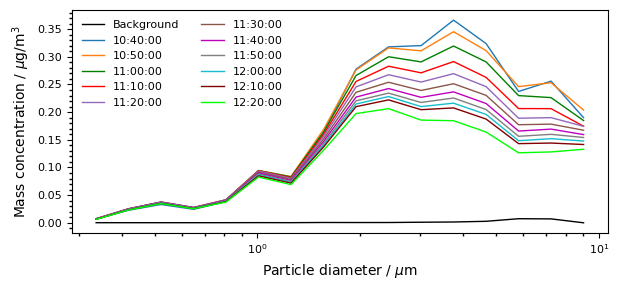

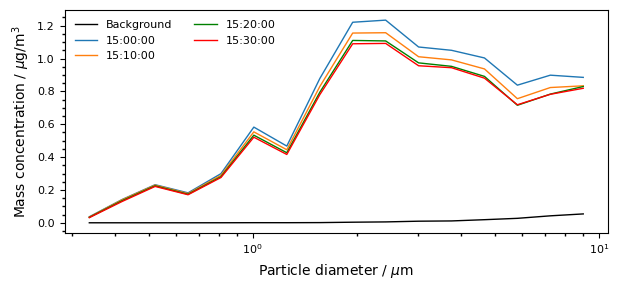

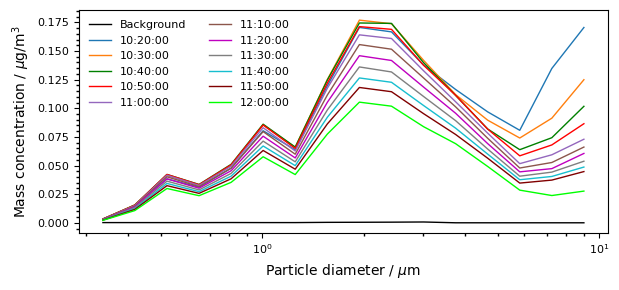

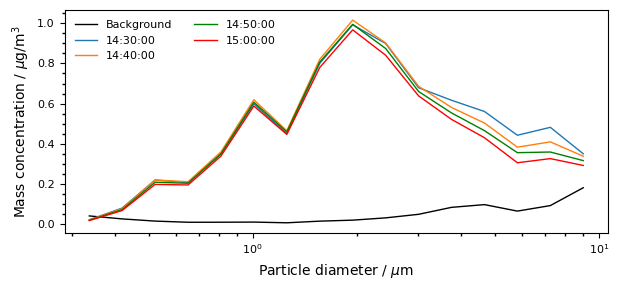

In [6]:
for i, key in enumerate(OPS_dict_keys):
    name = 'Running_mean/OPS_running_' + key + 'mass.png'

    fig, ax = plt.subplots(figsize = (6.3, 3))

    plot_running_mean(ax, OPS_running_mass[key], OPS_mid_point, 2, [ax_labels[0], ax_labels[2]])

    fig.tight_layout()
    fig.savefig(name, dpi = 600)
    plt.show()

In [9]:
NanoScan_dict_keys = ['2024-10-16_NanoScan', '2024-10-16_NanoScan', '2024-10-17_NanoScan', '2024-10-17_NanoScan']
NanoScan_bin_mean = []
for key in SMPS['2024-10-16_NanoScan'].keys()[3:16]:
    NanoScan_bin_mean.append(float(key))
NanoScan_Bins = SMPS['2024-10-16_NanoScan'].keys()[3:16].to_list()

NanoScan_running = {}
for i, key in enumerate(NanoScan_dict_keys):
    exp_number = str(i + 1)
    new_key = 'Exp' + exp_number
    bg_number = running_mean(SMPS, key, NanoScan_Bins, 'Time', '10T', 10, timestamps_BG_before[i])
    exp_number = running_mean(SMPS, key, NanoScan_Bins, 'Time', '10T', 10, timestamps_exp[i])
    NanoScan_running[new_key] = pd.concat([bg_number, exp_number]).T

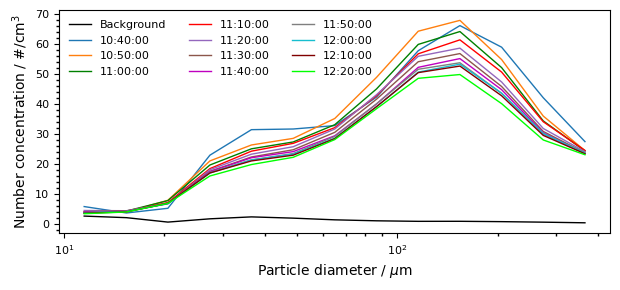

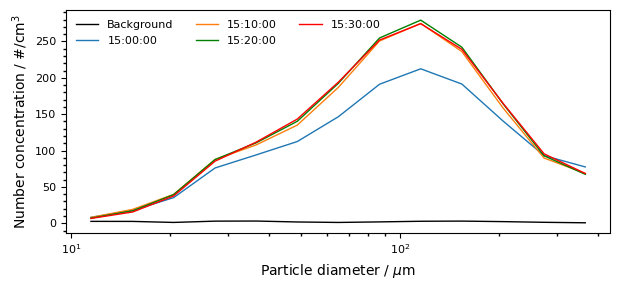

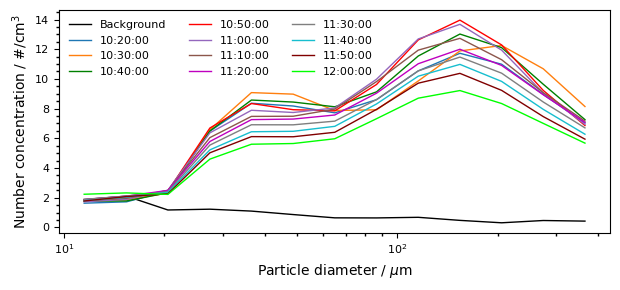

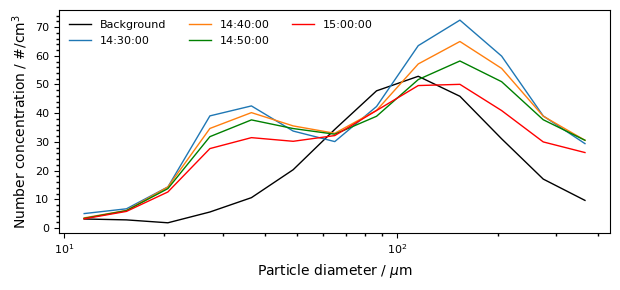

In [14]:
for i, key in enumerate(NanoScan_running):
    exp_number = str(i + 1)
    name = 'Running_mean/NanoScan_running_' + key + '.png'

    fig, ax = plt.subplots(figsize = (6.3, 3))

    plot_running_mean(ax, NanoScan_running[key], NanoScan_bin_mean, 3, ax_labels[:2])

    fig.tight_layout()
    fig.savefig(name, dpi = 600)
    plt.show()

In [10]:
APS_dict_keys = ['20241016_APS', '20241016_APS_2_exp', '20241017_APS', '20241017_APS']
APS_bins = OPS_APS['20241016_APS'].keys()[5:56].to_list()
APS_bin_mean = []
for key in OPS_APS['20241016_APS'].keys()[5:56]:
    APS_bin_mean.append(float(key))
    OPS_APS['20241016_APS'][key] = pd.to_numeric(OPS_APS['20241016_APS'][key], errors='coerce') * 7.86

APS_mass_conc = {}
APS_mass_conc['20241016_APS'] = OPS_APS['20241016_APS']
for key in APS_dict_keys[1:]:
    mass_conc = calc_mass_conc(OPS_APS[key], APS_bins, APS_bin_mean, 7.86)
    APS_mass_conc[key] = mass_conc

APS_number = pd.DataFrame({'Time': OPS_APS['20241016_APS']['Time']})
for i, key in enumerate(APS_bins):
        # Ensure df[key] is numeric
        OPS_APS['20241016_APS'][key] = pd.to_numeric(OPS_APS['20241016_APS'][key], errors='coerce')
        
        APS_number[key] = OPS_APS['20241016_APS'][key] / ((7.86 / 10**6) * (np.pi / 6) * APS_bin_mean[i]**3 * 10**6) # in #/cm**3
OPS_APS['20241016_APS'] = APS_number

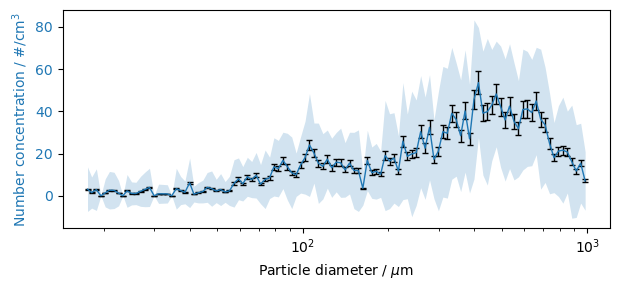

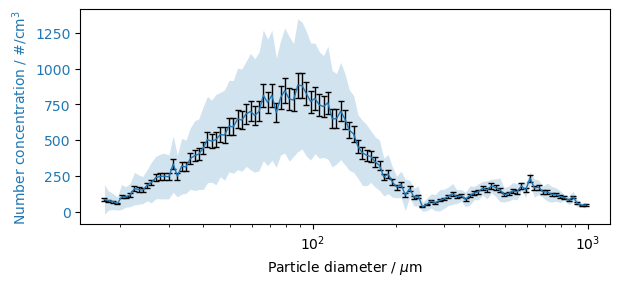

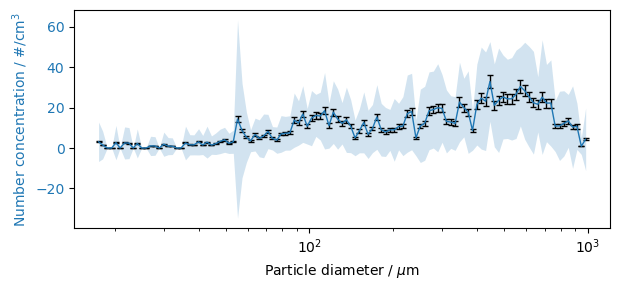

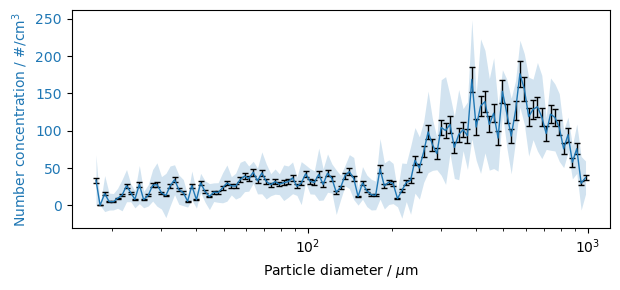

In [ ]:
SMPS_dict_keys = ['20241016_SMPS', '20241016_SMPS_2_exp', '20241017_SMPS', '20241017_SMPS']
SMPS_bins = SMPS['20241016_SMPS'].keys()[83:196].to_list()
SMPS_bin_mean = []
for key in SMPS['20241016_SMPS'].keys()[83:196]:
    SMPS_bin_mean.append(float(key))